# Air Quality Index Prediction 

In [20]:
import os
import time
import requests
import sys
import pandas as pd
import numpy as np

# 1. Dynamically collecting data by downlading the html 

In [84]:
def retrieve_html():
    for year in range(2013,2020):
        for month in range(1,13):
            if(month<10):
                url = 'https://en.tutiempo.net/climate/0{}-{}/ws-421820.html'.format(month,year)
                
            else:
                url = 'https://en.tutiempo.net/climate/{}-{}/ws-421820.html'.format(month,year)
            texts = requests.get(url)
            text_utf = texts.text.encode('utf=8')
        
            if not os.path.exists("C:/Everything/Data/Html_data/{}".format(year)):
                os.makedirs("C:/Everything/Data/Html_data/{}".format(year))
            with open("C:/Everything/Data/Html_data/{}/{}.html".format(year,month),"wb") as output:
                output.write(text_utf)
            
        sys.stdout.flush()
        
        
if __name__=="__main__":
    start_time = time.time()
    retrieve_html()
    stop_time = time.time()
    print("Time taken {}".format(stop_time-start_time))

Time taken 243.20982766151428


# 2. Plot AQI

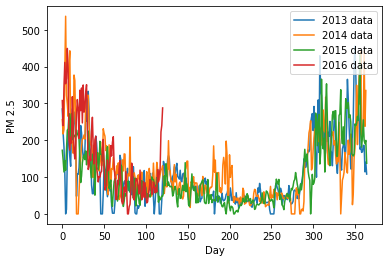

In [113]:
import pandas as pd
import matplotlib.pyplot as plt


def avg_data_2013():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2013.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2014():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2014.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    
def avg_data_2015():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2015.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average

    
def avg_data_2016():
    temp_i=0
    average=[]
    for rows in pd.read_csv('C:/Everything/Data/AQI/aqi2016.csv',chunksize=24):
        add_var=0
        avg=0.0
        data=[]
        df=pd.DataFrame(data=rows)
        for index,row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var=add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp=float(i)
                    add_var=add_var+temp
        avg=add_var/24
        temp_i=temp_i+1
        
        average.append(avg)
    return average
    

if __name__=="__main__":
    lst2013=avg_data_2013()
    lst2014=avg_data_2014()
    lst2015=avg_data_2015()
    lst2016=avg_data_2016()
    plt.plot(range(0,365),lst2013,label="2013 data")
    plt.plot(range(0,364),lst2014,label="2014 data")
    plt.plot(range(0,365),lst2015,label="2015 data")
    plt.plot(range(0,121),lst2016,label="2016 data")
    plt.xlabel('Day')
    plt.ylabel('PM 2.5')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
#Scraping through html using Beautifulsoup

import csv
from bs4 import BeautifulSoup
#from Plot_AQI import avg_data_2013, avg_data

# 3. Data Extraction

In [114]:
#from Plot_AQI import avg_data_2013,avg_data_2014,avg_data_2015,avg_data_2016,avg_data_2017,avg_data_2018,avg_data_2019
def met_data(month, year):
    
    file_html = open('C:/Everything/Data/Html_data/{}/{}.html'.format(year, month), 'rb')
    plain_text = file_html.read()
    #print(plain_text)
    
    tempD = []
    finalD = []
    
    soup = BeautifulSoup(plain_text, "lxml")
    #print(soup)
    
    for table in soup.findAll('table', {'class': 'medias mensuales numspan'}):
        for tbody in table:
            for tr in tbody:
                a = tr.get_text()
                tempD.append(a)
                #print(tempD)
                
    rows = len(tempD) / 15
    #print(rows)
    
    for times in range(round(rows)):
        newtempD = []
        for i in range(15):
            newtempD.append(tempD[0])
            tempD.pop(0)
        finalD.append(newtempD)
    #print(finalD)
    
    length = len(finalD)
    #print(length)
    
    finalD.pop(length - 1)
    finalD.pop(0)
    
    for a in range(len(finalD)):
        finalD[a].pop(6)
        finalD[a].pop(13)
        finalD[a].pop(12)
        finalD[a].pop(11)
        finalD[a].pop(10)
        finalD[a].pop(9)
        finalD[a].pop(0)
    
    #print(finalD)
    return finalD

def data_combine(year, cs):
    for a in pd.read_csv('C:/Everything/Data/Real-Data/real_' + str(year) + '.csv', chunksize=cs):
        df = pd.DataFrame(data=a)
        mylist = df.values.tolist()
    return mylist

if __name__ == "__main__":
    if not os.path.exists("C:/Everything/Data/Real-Data"):
        os.makedirs("C:/Everything/Data/Real-Data")
    for year in range(2013, 2017):
        final_data = []
        
        with open('C:/Everything/Data/Real-Data/real_' + str(year) + '.csv', 'w') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            wr.writerow(
                ['T','TM','Tm','SLP','H','VV','V','VM','PM 2.5'])
            
        for month in range(1, 13):
            if year == 2016:
                if month < 5:
                    temp = met_data(month, year)
                    final_data = final_data + temp
                else:
                    break
            else:
                temp = met_data(month, year)
                final_data = final_data + temp
            
        
        pm = getattr(sys.modules[__name__], 'avg_data_{}'.format(year))()
        #pm
        #print(pm)
        
        if len(pm) == 364:
            pm.insert(364, '-')
        #print(pm)   
        
        for i in range(len(final_data)-1):
            final_data[i].insert(8, pm[i])
        #print(final_data)  
            
        with open('C:/Everything/Data/Real-Data/real_' + str(year) + '.csv', 'a') as csvfile:
            wr = csv.writer(csvfile, dialect='excel')
            for row in final_data:
                wr.writerow(row)
                flag = 0
                for elem in row:
                    if elem == "" or elem == "-":
                        flag = 1
                if flag != 1:
                    wr.writerow(row)
    #print(wr)
    data_2013 = data_combine(2013, 600)
    #print(data_2013)
    data_2014 = data_combine(2014, 600)
    data_2015 = data_combine(2015, 600)
    data_2016 = data_combine(2016, 600)
    
    total = data_2013+data_2014+data_2015+data_2016
    #total.dropna()
    #print(total)
    with open('C:/Everything/Data/Real-Data/Real_Combine.csv', 'w') as csvfile:
        wr = csv.writer(csvfile, dialect='excel')
        wr.writerow(
            ['T','TM','Tm','SLP','H','VV','V','VM','PM 2.5'])
        wr.writerows(total)


In [130]:
df = pd.read_csv('C:/Everything/Data/Real-Data/real_Combine.csv')
df

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,2,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
2,3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
3,4,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
4,8,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
...,...,...,...,...,...,...,...,...,...,...
1217,1821,33.4,40.0,21.2,1006.3,27.0,2.6,3.7,14.8,108.500000
1218,1822,33.2,40.3,22.2,1005.1,29.0,2.3,5.0,14.8,123.333333
1219,1823,33.2,40.3,22.2,1005.1,29.0,2.3,5.0,14.8,123.333333
1220,1824,34.0,40.7,22.2,1004.6,24.0,2.4,11.9,22.2,222.416667


In [131]:
df=df[df != '-']
df = df.dropna()
df.shape

(1222, 10)

In [132]:
to_csv=df.to_csv('C:/Everything/Data/Real-Data/real_Combine.csv', header = True)

# 4. Applying ML Algorithms

# Feature Engineeering 

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv('C:/Everything/Data/Real-Data/real_Combine.csv')

In [219]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,7.6,15.7,2.7,1017.4,80.0,0.6,0.9,7.6,115.287500
3,6.6,12.6,1.9,1018.5,87.0,0.6,2.8,11.1,12.379167
4,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500


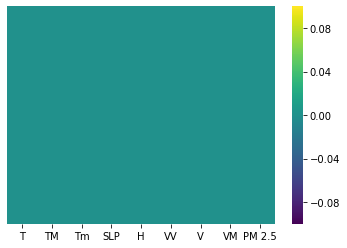

In [220]:
#Ways to check if there are any nulls values
#1
#df.isnull()
#2-Heat map
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [221]:
x = df.iloc[:,:-1] #independent varible
y = df.iloc[:,-1] #dependent varible

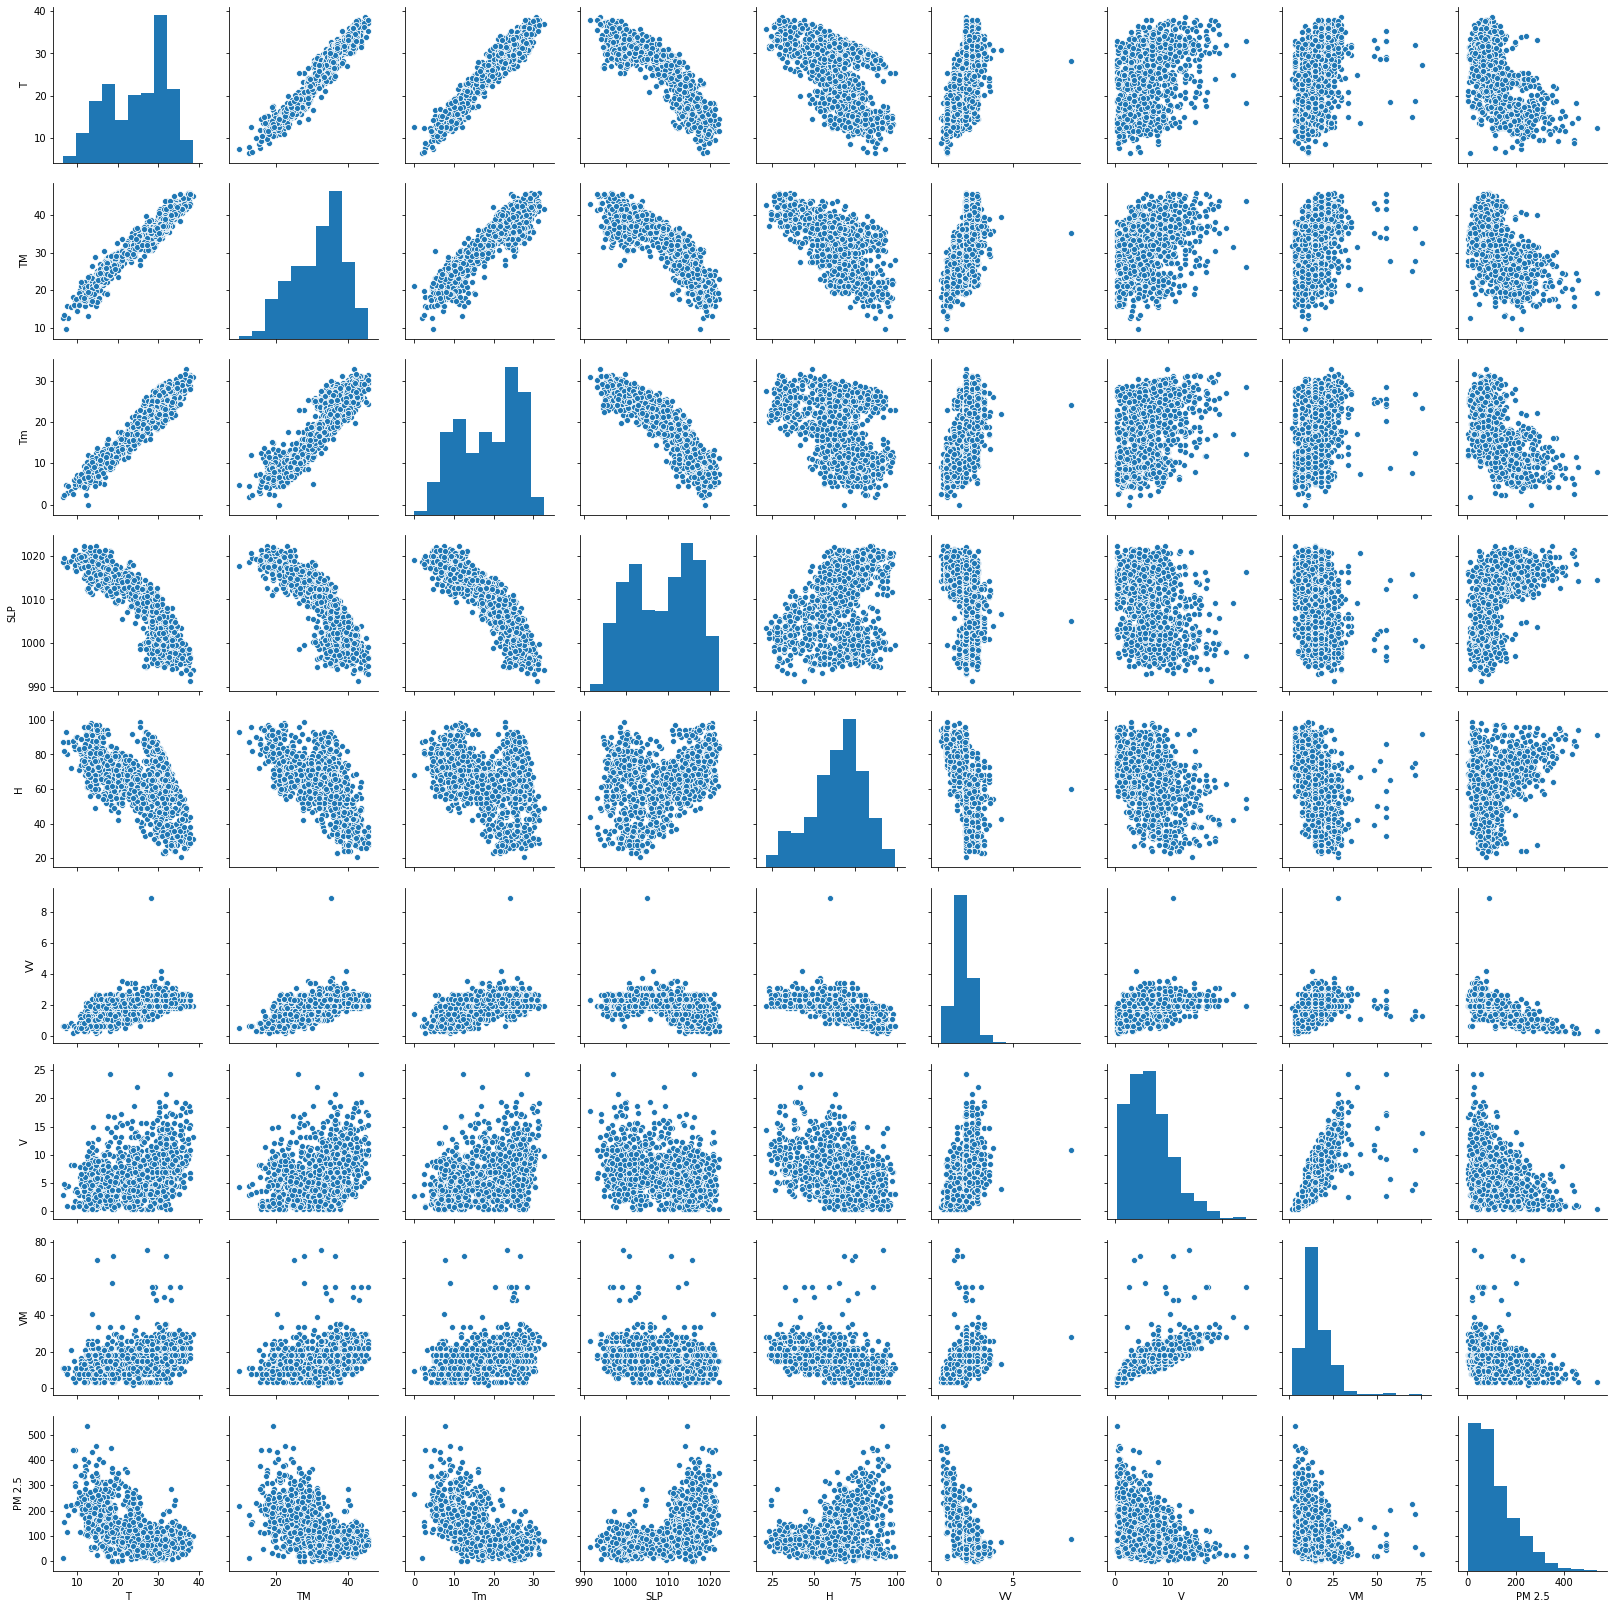

In [222]:
sns.pairplot(df)

In [223]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967033,0.960761,-0.888843,-0.544565,0.586565,0.342204,0.266351,-0.639066
TM,0.967033,1.000000,0.899057,-0.838290,-0.622354,0.583805,0.322313,0.272134,-0.582018
Tm,0.960761,0.899057,1.000000,-0.909013,-0.348847,0.512387,0.331165,0.247374,-0.673804
SLP,-0.888843,-0.838290,-0.909013,1.000000,0.314512,-0.429380,-0.332249,-0.270540,0.611188
H,-0.544565,-0.622354,-0.348847,0.314512,1.000000,-0.538594,-0.404380,-0.343476,0.256154
VV,0.586565,0.583805,0.512387,-0.429380,-0.538594,1.000000,0.420378,0.331313,-0.682019
V,0.342204,0.322313,0.331165,-0.332249,-0.404380,0.420378,1.000000,0.733795,-0.434869
VM,0.266351,0.272134,0.247374,-0.270540,-0.343476,0.331313,0.733795,1.000000,-0.336176
PM 2.5,-0.639066,-0.582018,-0.673804,0.611188,0.256154,-0.682019,-0.434869,-0.336176,1.000000


Using heatmap to check correlation


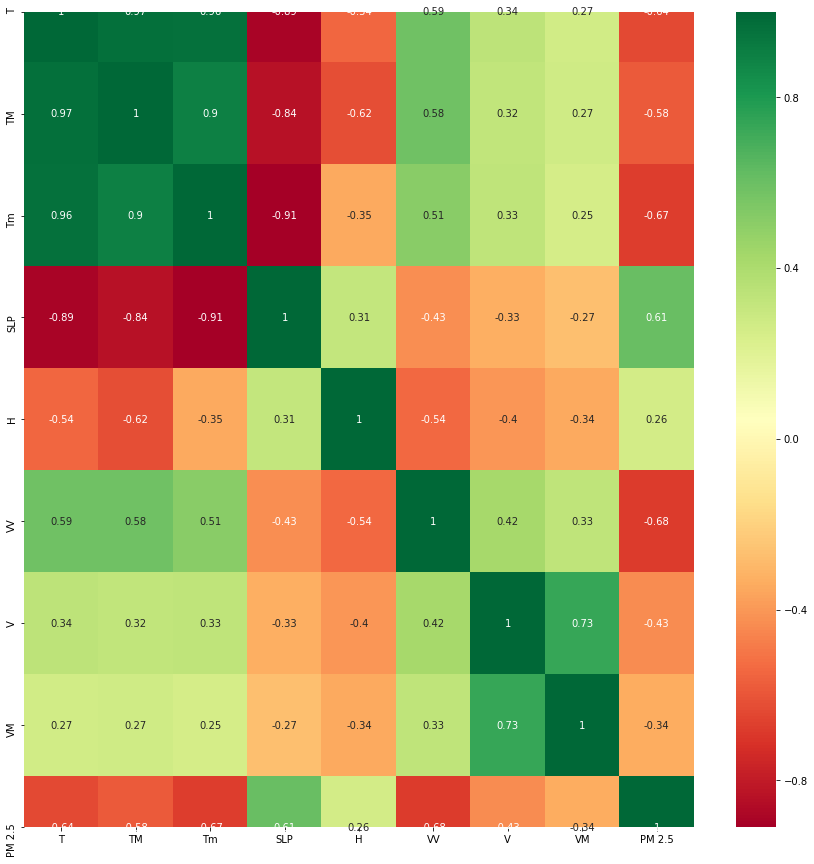

In [224]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [225]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [226]:
print(model.feature_importances_)

[0.06421911 0.03827607 0.36332245 0.07286221 0.07159305 0.30112918
 0.04270665 0.04589128]


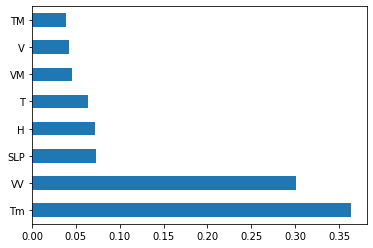

In [227]:
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### (a) Linear Regression 

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [455]:
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [456]:
print("Coefficient of determination R^2 <-- on train set: {}".format(lin_reg.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(lin_reg.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6592500421626452
Coefficient of determination R^2 <-- on test set: 0.6734800849147683


In [469]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg,x,y,cv=5)
score

array([0.46919   , 0.65403682, 0.33445223, 0.5732648 , 0.61181295])

In [459]:
score.mean()

0.5285513620842772

In [466]:
score.std()

0.1147838222028376

In [460]:
lin_reg.coef_

array([ 2.73477022e+00,  1.70110832e+00, -7.83080429e+00,  1.03769225e+00,
       -6.00946869e-01, -6.01989355e+01, -2.83266610e+00,  1.74851973e-02])

In [461]:
lin_reg.intercept_

-742.9971408468268

Model Evaluation

In [462]:
coeff_df = pd.DataFrame(lin_reg.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,2.734770
TM,1.701108
Tm,-7.830804
SLP,1.037692
H,-0.600947
VV,-60.198936
V,-2.832666
VM,0.017485


In [463]:
pred = lin_reg.predict(X_test)

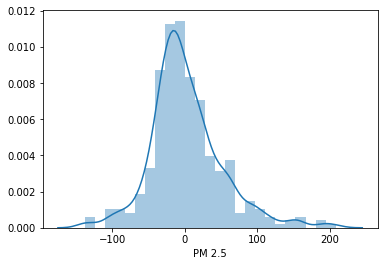

In [464]:
sns.distplot(y_test-pred)

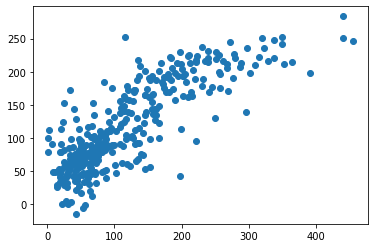

In [259]:
plt.scatter(y_test,pred)

Regression Evaluation Metrics

In [465]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 36.60504273894725
MSE: 2535.0039422462014
RMSE 50.34882265005013


In [265]:
import pickle
#open a file to store values in 
file = open('regression_model.pkl', 'wb')

#write data into the file
pickle.dump(regressor, file)

### (b) Ridge Regression

In [266]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [287]:
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,25,30,33,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 33, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [288]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-2826.612499673038


### (c) Lasso Regression

In [284]:
from sklearn.linear_model import Lasso

In [293]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169787.490567983, tolerance: 723.7390917816559
  positive)
C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1068076.7761575587, tolerance: 610.6046324551694
  positive)
C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 940663.0589109473, tolerance: 679.7105659538465
  positive)
C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.p

{'alpha': 1}
-2842.148109828462


In [294]:
pred_lasso=lasso_regressor.predict(X_test)

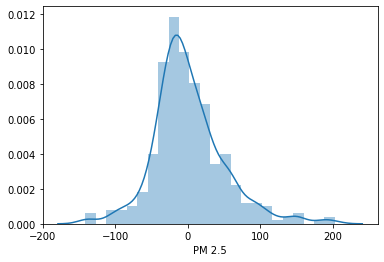

In [295]:
sns.distplot(y_test-pred_lasso)

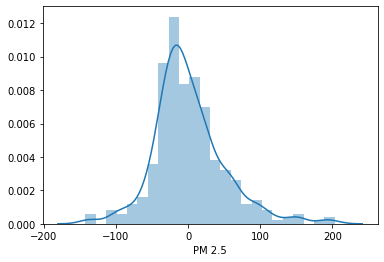

In [297]:
pred_ridge=ridge_regressor.predict(X_test)
sns.distplot(y_test-pred_ridge)

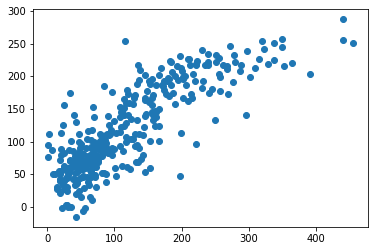

In [300]:
plt.scatter(y_test,pred_lasso)

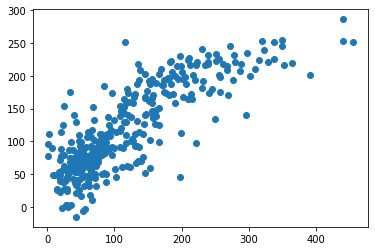

In [301]:
plt.scatter(y_test,pred_ridge)

In [304]:
#Evaluation metrics on lasso
print('MAE:', metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

MAE: 36.24165391406105
MSE: 2465.339041409419
RMSE: 49.65218063095939


In [305]:
#Evaluation metrics on ridge
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

MAE: 36.44781211368977
MSE: 2481.2697138263716
RMSE: 49.812344994251895


In [306]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)

### (d) Decision Tree Regressor

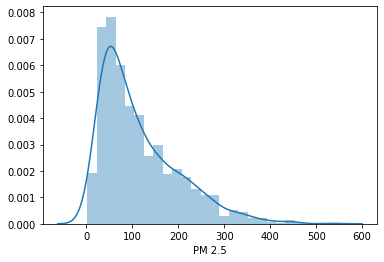

In [307]:
sns.distplot(y)

In [308]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [309]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [310]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.5685895483213587


In [311]:
score_dtree=cross_val_score(dtree,x,y,cv=5)

In [312]:
score.mean()

0.5285513620842772

In [321]:
pred_tree = dtree.predict(X_test)

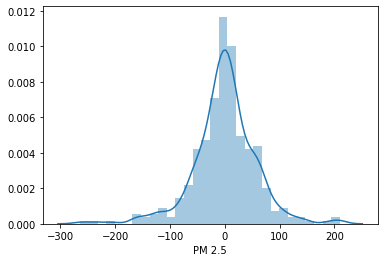

In [322]:
sns.distplot(y_test-pred_tree)

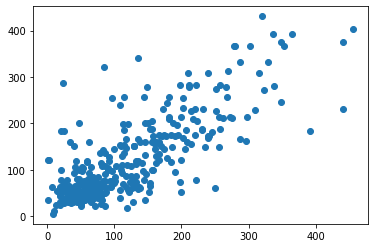

In [323]:
plt.scatter(y_test,pred_tree)

##### Hyperparameter Tuning Decision Tree Regressor

In [325]:
DecisionTreeRegressor()

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [332]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [333]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [334]:
random_search.fit(x,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 4288 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 8320 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 13504 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 19840 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 27328 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 35968 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 45760 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 56704 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 68800 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 82048 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 96448 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  4.8min finished
C:\Users\vivek.aryan

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,

In [335]:
random_search.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [336]:
random_search.best_score_

-2655.9117225779064

In [338]:
pred_hyp = random_search.predict(X_test)

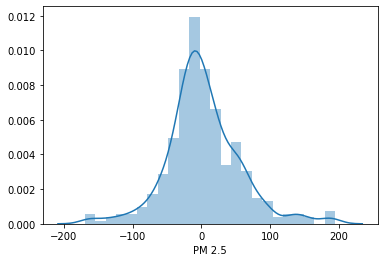

In [339]:
sns.distplot(y_test-pred_hyp)

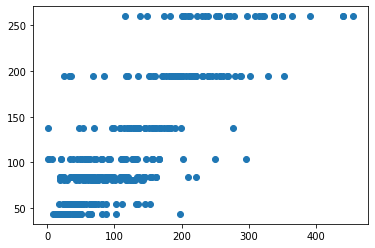

In [340]:
plt.scatter(y_test,pred_hyp)

In [341]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_hyp))
print('MSE:', metrics.mean_squared_error(y_test, pred_hyp))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_hyp)))

MAE: 38.91548628357457
MSE: 2913.0075444291724
RMSE: 53.972284965796774


In [342]:

# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)

### (e) KNN Regressor

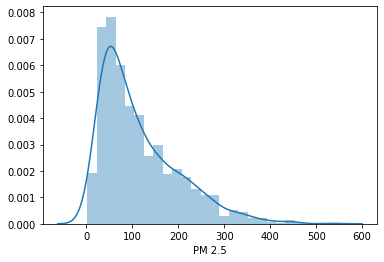

In [343]:
sns.distplot(y)

In [399]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors=5)


In [400]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [401]:
print("Coefficient of determination R^2 on train set: {}".format(knn_regressor.score(X_train,y_train)))

Coefficient of determination R^2 on train set: 0.7298584769497376


In [402]:
print("Coefficient of determinatiopn R^2 on test set: {}".format(knn_regressor.score(X_test,y_test)))

Coefficient of determinatiopn R^2 on test set: 0.5843697980045557


In [471]:
score = cross_val_score(knn_regressor,x,y,cv=5)
score.mean()

0.3592929702908868

In [404]:
knn_pred = knn_regressor.predict(X_test)

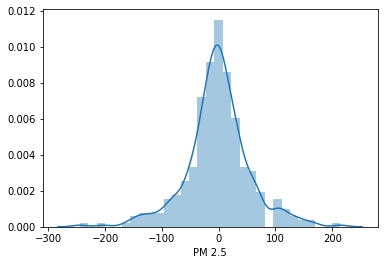

In [405]:
sns.distplot(y_test-knn_pred)

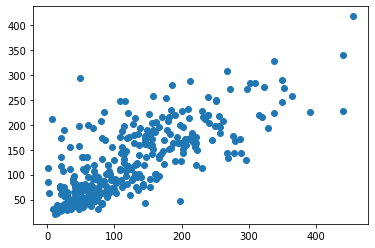

In [406]:
plt.scatter(y_test,knn_pred)

##### Hyperparameter tuning 

In [407]:
accuracy_rate = []

for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=5)
    score=cross_val_score(knn,x,y,cv=5,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

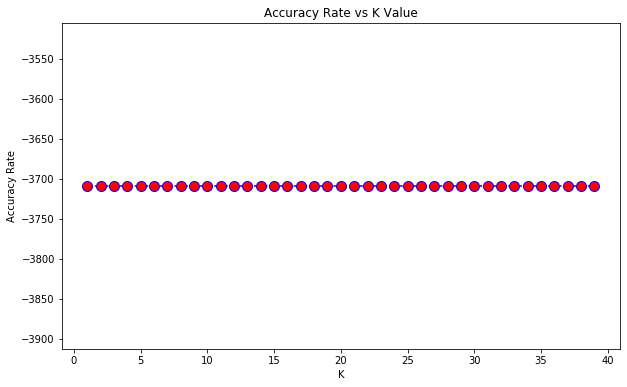

In [408]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

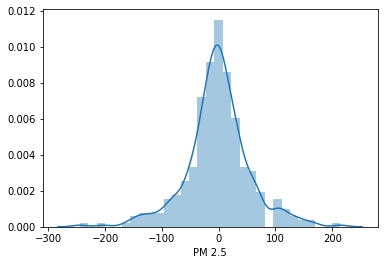

In [409]:
sns.distplot(y_test-knn_pred)

In [410]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, knn_pred))
print('MSE:', metrics.mean_squared_error(y_test, knn_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))

MAE: 39.897459173871276
MSE: 3226.8298253722387
RMSE: 56.80519188746957


In [413]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(knn_regressor, file)

### (f) Random Forest Regressor

In [415]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
rf_random.fit(X_train,y_train)

C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [417]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf_random.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9515357780806127


In [418]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rf_random.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7691756086791788


In [424]:
rf_score=cross_val_score(rf_random,x,y,cv=2)
rf_score.mean()

0.6497747853628413

In [426]:
rf_pred = rf_random.predict(X_test)

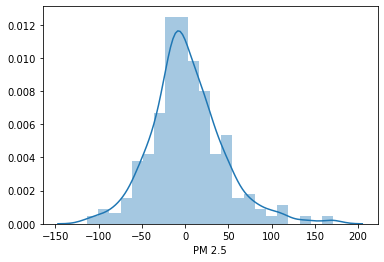

In [427]:
sns.distplot(y_test-rf_pred)

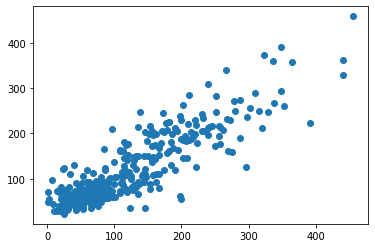

In [428]:
plt.scatter(y_test,rf_pred)

In [429]:
from sklearn.model_selection import RandomizedSearchCV

In [431]:
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [435]:
#Randomized Search CV


n_estimators   #No.of trees in random forest

max_features = ['auto', 'sqrt']   #No.pf features to consider a every split

max_depth = [int(i) for x in np.linspace(5, 30, num=6)]  #max levels in a tree

min_samples_split = [2, 5, 10, 15, 100]  #min no.of samoles needed to split a node

min_samples_leaf = [1, 2, 5, 10]  #min no.of samples required at each node

In [436]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [39, 39, 39, 39, 39, 39], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [437]:
rf = RandomForestRegressor()

In [438]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [439]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39, total=   0.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39, total=   0.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39, total=   0.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39, total=   0.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=39, total=   0.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=39 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=39, total=   1.0s
[CV] n_estimators=200, min_samp

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 13.6min finished
C:\Users\vivek.aryan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [440]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 39}

In [441]:
rf_random.best_score_

-1754.637878957173

In [442]:
rf_pred = rf_random.predict(X_test)

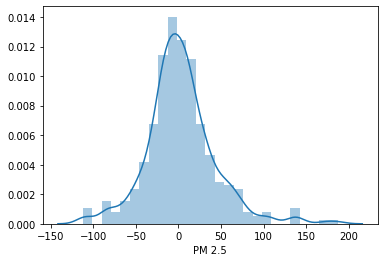

In [443]:
sns.distplot(y_test-rf_pred)

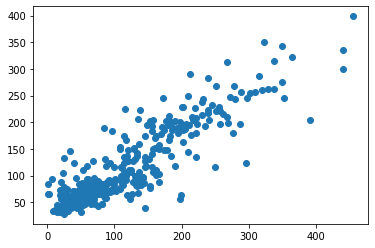

In [444]:
plt.scatter(y_test, rf_pred)

In [445]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 29.270158553871752
MSE: 1701.4686893226424
RMSE: 41.24886288520742


In [446]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)